# Classfication

### KNN

In [20]:
# Import modules
from sklearn import datasets as ds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# load dataset
iris = ds.load_iris()

# Create feature and target arrays
X = iris.data
y = iris.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21, stratify=y)

# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# predict labels on testing data
y_pred = knn.predict(X_test)

# Print the accuracy
print(metrics.accuracy_score(y_test, y_pred))


0.9736842105263158


In [22]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]


### Logistic Regression, ROC and AUC

In [60]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=0, names=col_names)
print(pima.head())
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
#Train a Logistic Regression Model on training dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print('test predictions')
print(y_pred_class[:8])
# predicted probabilities
print('predicted probabilities of class 0 and class 1')
y_pred_prob = logreg.predict_proba(X_test)
print(y_pred_prob[:8,:])


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
test predictions
[1 0 0 0 1 0 0 0]
predicted probabilities of class 0 and class 1
[[0.47271205 0.52728795]
 [0.60586203 0.39413797]
 [0.76084544 0.23915456]
 [0.57461105 0.42538895]
 [0.47436193 0.52563807]
 [0.82518269 0.17481731]
 [0.72803701 0.27196299]
 [0.7689474  0.2310526 ]]


Text(0,0.5,'True Positive Rate (Sensitivity)')

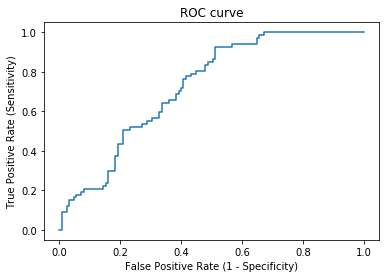

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
# probabilities of class 1
y_pred_prob_1 = y_pred_prob[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [51]:
tpr[thresholds > 0.3]

array([0.        , 0.        , 0.06451613, 0.06451613, 0.08064516,
       0.08064516, 0.09677419, 0.09677419, 0.17741935, 0.17741935,
       0.19354839, 0.19354839, 0.20967742, 0.20967742, 0.22580645,
       0.22580645, 0.24193548, 0.24193548, 0.27419355, 0.27419355,
       0.29032258, 0.29032258, 0.32258065, 0.32258065, 0.33870968,
       0.33870968, 0.38709677, 0.38709677, 0.43548387, 0.43548387,
       0.4516129 , 0.4516129 , 0.46774194, 0.46774194, 0.48387097,
       0.48387097, 0.5       , 0.5       , 0.53225806, 0.53225806,
       0.5483871 , 0.5483871 , 0.59677419, 0.59677419, 0.66129032,
       0.66129032, 0.72580645, 0.72580645])

In [62]:
#AUC 
print(metrics.roc_auc_score(y_test, y_pred_prob_1))

0.7242985074626866
